In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pickle
import uproot as ur
import re
from scipy.interpolate import UnivariateSpline
from scipy.signal import find_peaks
def configure_plotting():
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['savefig.facecolor'] = 'white'
    plt.rcParams['savefig.bbox'] = 'tight'
    hep.style.use(hep.style.CMS)

In [32]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2. * sigma ** 2))

In [33]:
input_file = f"../../genIII_data/Sim/muon_4GeV.edm4hep.root"

events = ur.open("%s:events"%(input_file))

In [35]:
energies = []
for i in range(len(np.array(events["HcalFarForwardZDCHits"]["HcalFarForwardZDCHits.energy"]))):
    energies.append(np.array(events["HcalFarForwardZDCHits"]["HcalFarForwardZDCHits.energy"])[i])
    
energies = np.array([e for es in energies for e in es])

0.0008711311657762863


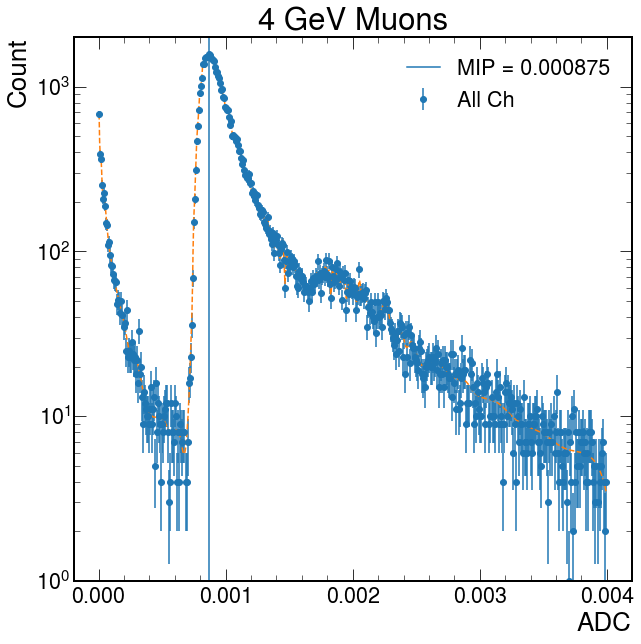

In [43]:
configure_plotting()
data = np.array(energies)
counts, bin_edges = np.histogram(data, bins=500, range=[0, 0.004])
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errors = np.sqrt(counts)

plt.errorbar(bin_centers, counts, yerr=errors, fmt='o', label="All Ch")

# Smooth histogram with spline
spline = UnivariateSpline(bin_centers, counts, s=10000, k=3)
interp_x = np.linspace(bin_centers[0], bin_centers[-1], 1000)
interp_y = spline(interp_x)

peaks, properties = find_peaks(interp_y, height=0.0008)
peak_heights = properties["peak_heights"]
peak_positions = interp_x[peaks]

if len(peak_positions) > 0:
    max_idx = np.argmax(peak_heights)
    mip_peak = peak_positions[max_idx]
else:
    mip_peak = 0

plt.axvline(x=mip_peak, label="MIP = 0.000875")
plt.plot(interp_x, interp_y, linestyle="--")
plt.xlabel("ADC")
plt.ylabel("Count")
plt.title("4 GeV Muons")
plt.legend()
plt.yscale('log')
plt.ylim(1,2000)
print(mip_peak)